# CNN on TensorFlow for lung cancer image data by Wenqing Sun
Lables.txt records the malignancy of each image

11484 images in total

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from IPython.display import Image, display
from scipy import ndimage
import tensorflow as tf
import pickle

In [2]:
IMAGE_DIR = '/home/joey/Work/thesis_code/data/Nodule'
IMAGE_SIZE = 100
IMAGE_DEPTH = 255
CHANNEL_NUM=3

In [3]:
%matplotlib inline

Read the label file as a python dictionary

In [4]:
mali_label_dict = {}
with open('/home/joey/Work/thesis_code/labels.txt', 'r+') as label_file:
    labels = label_file.read().split('\n')
    labels.pop(-1)
    for filename_label in labels:
        tmp_file_label = filename_label.split(' ')
        is_mali = False
        if tmp_file_label[1] == 'true':
            is_mali = True
        mali_label_dict[tmp_file_label[0]] = is_mali
        

In [8]:
sum(mali_label_dict.values())
print(len(mali_label_dict))

11484


In [5]:
# print(mali_label_dict["Nodule_203.png"])
len(mali_label_dict)

11484

select 200 images randomly as test dataset and validation dataset respectively

In [6]:
########
# run this cell only once
import random
from shutil import move

def rmdir_(dir_name):
    children = os.listdir(dir_name)
    for x in children:
        child = os.path.join(dir_name, x)
        if os.path.isdir(child):
            rmdir_(child)
        elif os.path.isfile(child):                       
            os.remove(child)
    os.rmdir(dir_name)
             
def create_dataset(dataset_name, from_data="data/data/Nodule", force=False):
    if os.path.exists(dataset_name) and force:
        print("Removing existing directory:", dataset_name)
        rmdir_(dataset_name)
    elif os.path.exists(dataset_name) and not force:
        print("%s already exists, skip creating..." % dataset_name)
        return os.listdir(dataset_name)
    else:
        os.mkdir(dataset_name)
    try:
        image_files = os.listdir(from_data)
        data_set = random.sample(image_files, 200)
        for smpl in data_set:
            move(os.path.join(from_data, smpl), dataset_name)
        return data_set
    except IOError as e:
        print("Can't create dataset", "dataset_name:", str(e))

In [7]:
test_set = create_dataset("test_set", from_data=IMAGE_DIR)
validating_set = create_dataset("validating_set", from_data=IMAGE_DIR)
training_set = os.listdir(IMAGE_DIR)

load all the images into a tensor

In [8]:
def load_image_tensor(folder):
    """
    folder: image data folder
    """
    image_files = os.listdir(folder)
    image_tensor = np.ndarray(shape=(len(image_files), IMAGE_SIZE, IMAGE_SIZE, CHANNEL_NUM),
                        dtype=np.float32)
    image_idx = 0
    print(folder)
    for image in image_files:
        image_file = os.path.join(folder, image)
        image_data = (ndimage.imread(image_file).astype(float) - 
                    IMAGE_DEPTH / 2) / IMAGE_DEPTH
        image_tensor[image_idx, :, :] = image_data
        image_idx += 1
        
    return image_tensor


def pickle_tensor(dataset_name, data_dir, force=False):
    """
    dataset: image folder
    """
    pickle_name = dataset_name + '.pickle'
    if os.path.exists(pickle_name) and not force:
      # override by setting force=True.
      print('%s already present - Skipping pickling.' % pickle_name)
    else:
      print('Pickling %s.' % pickle_name)
      image_tensor = load_image_tensor(data_dir)
      try:
        with open(pickle_name, 'wb') as f:
          pickle.dump(image_tensor, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', pickle_name, ':', e)       
    return pickle_name

In [9]:
pickle_tensor("test_set", "test_set")

Pickling test_set.pickle.
test_set


'test_set.pickle'

In [10]:
pickle_tensor("validating_set", "validating_set")

Pickling validating_set.pickle.
validating_set


'validating_set.pickle'

In [12]:
pickle_tensor("training_set", "data/Nodule")

Pickling training_set.pickle.
data/Nodule


'training_set.pickle'

In [14]:
training_tensor = load_image_tensor("data/Nodule")

data/Nodule


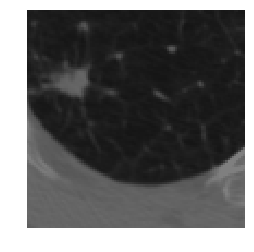

In [21]:
plt.axis("off")
plt.imshow(training_tensor[0, :, :, :])

In [16]:
len(training_tensor)

11084

In [17]:
training_tensor.shape

(11084, 100, 100, 3)

In [18]:
test_tensor = load_image_tensor("test_set")

test_set


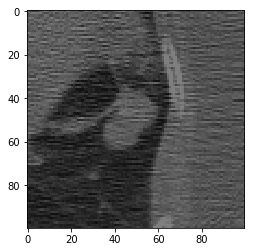

In [19]:
plt.imshow(test_tensor[0,:,:,:])

In [20]:
test_tensor[0,4,4,:]

array([ 0.4254902,  0.4254902,  0.4254902], dtype=float32)